In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, bisect
%matplotlib inline

In [49]:
def sol1(pi1,q1,q2,l):
    r1, r2 = 1/q1, 1/q2
    f0 = r2/l
    f1= f0*pi1*(1-l)/(r1-r2)
    f2 = 1-f0*(1+pi1*(1-l)/(r1-r2))
    return f0,f1,f2

def sol2(pi1,q1,q2,l):
    r1, r2 = 1/q1, 1/q2
    B = pi1*(1-l)+r1-l
    f1 = (-B + np.sqrt(B**2 + 4*l*(1-l)*pi1))/(2*l)
    f0, f2 = 1 - f1, 0.0
    return f0,f1,f2

def sol3(pi1,q1,q2,l):
    r1, r2 = 1/q1, 1/q2
    B = pi1*(1-l)+r1-l
    f1 = (-B - np.sqrt(B**2 + 4*l*(1-l)*pi1))/(2*l)
    f0, f2 = 1 - f1, 0.0
    return f0,f1,f2

# this actually the eigenvalue
def lambda_change_stab(l,pi1,q1,q2): # equation to solve in order to find the lambda where the stability changes
    r1, r2 = 1/q1, 1/q2
    B = pi1*(1-l)+r1-l
    pi1ef = pi1*(1-l)
    # return (2*l+B)**2 + B**2 + 4*l*pi1ef - 2*(2*l+B)*(B**2 + 4*l*pi1ef) - 4*r2**2
    return 2*l+B - np.sqrt(B**2 + 4*l*pi1ef) - 2*r2

def wolfram(pi1, q1, q2):
    r1, r2 = 1/q1, 1/q2
    return r2*(pi1+r1-r2)/(pi1*r2 + r1 - r2)

In [10]:
fs_sol1 = [sol1(0.25, 7.0, 10.0, l) for l in [0.8, 0.9]]

In [15]:
fs_sol1 = np.array(fs_sol1)

In [18]:
fs_sol1[:,0]

array([0.125     , 0.11111111])

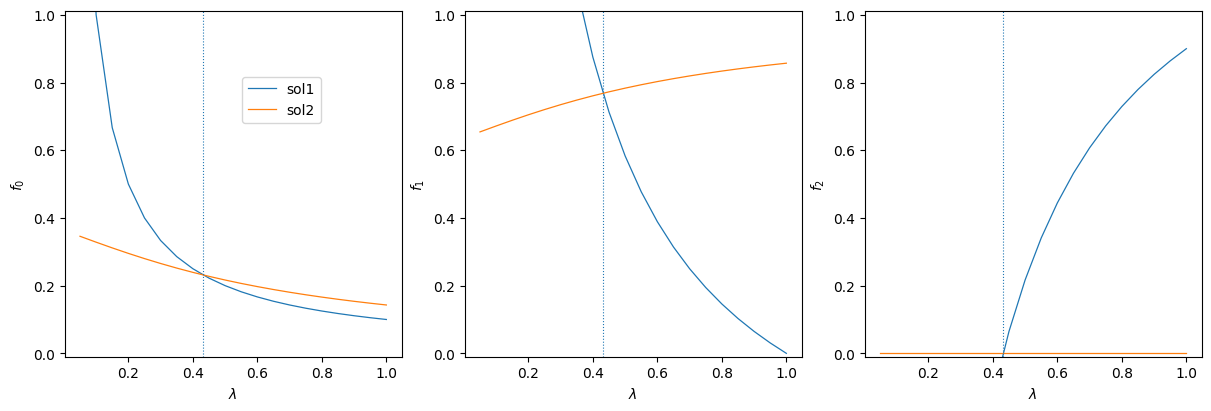

In [56]:
pi1, q1, q2 = 0.25, 7.0, 10.0
ls = np.arange(0.05, 1.05, 0.05)

fs_sol1 = np.array([sol1(pi1, q1, q2, l) for l in ls])
fs_sol2 = np.array([sol2(pi1, q1, q2, l) for l in ls])
# fs_sol3 = np.array([sol3(pi1, q1, q2, l) for l in ls]) # f1<0 always...

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)

for i in range(3):
    if i == 0:
        ax[i].plot(ls, fs_sol1[:,i], lw=0.9, label='sol1')
        ax[i].plot(ls, fs_sol2[:,i], lw=0.9, label='sol2')
        # ax[i].plot(ls, fs_sol3[:,i], lw=0.9, label='sol3')
    else:
        ax[i].plot(ls, fs_sol1[:,i], lw=0.9)
        ax[i].plot(ls, fs_sol2[:,i], lw=0.9)
        # ax[i].plot(ls, fs_sol3[:,i], lw=0.9)
    ax[i].set(xlabel='$\lambda$', ylabel=f'$f_{i}$', ylim=(-0.01, 1.01))
    ax[i].axvline(wolfram(pi1,q1,q2), ls=':', lw=0.8)
fig.legend(loc=(0.2, 0.7))
fig.savefig(f'asym_sols_pi2_eq_0_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}.png')

In [47]:
bisect(lambda_change_stab, 0.00, 1.0, args=(0.25, 7.0, 10.0))

0.4315789473675977

In [50]:
wolfram(0.25, 7.0, 10.0)

0.4315789473684211

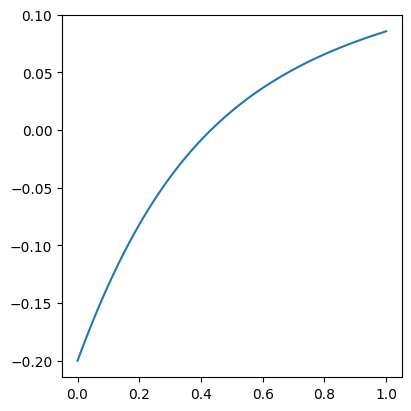

In [46]:
ls = np.arange(0.0, 1.01, 0.01)

lcs = [lambda_change_stab(l, 0.25, 7.0, 10.0) for l in ls]

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.plot(ls, lcs)
